In [16]:
import numpy as np
import pandas as pd
from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic, plot_loss
from solvers_utils import logistic, logistic_der, f_and_df

# Load datasets

## Synthetic dataset

In [2]:
X_train_syn = pd.read_csv("datasets/synthetic/syn_X_train.csv").values
y_train_syn = pd.read_csv("datasets/synthetic/syn_y_train.csv").values.reshape(-1)
X_test_syn = pd.read_csv("datasets/synthetic/syn_X_test.csv").values
y_test_syn = pd.read_csv("datasets/synthetic/syn_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_syn.shape}, y_train = {y_train_syn.shape}
X_test = {X_test_syn.shape}, y_test = {y_test_syn.shape}""")


Apple quality dataset
X_train = (4000, 11), y_train = (4000,)
X_test = (1000, 11), y_test = (1000,)


In [3]:
w0Syn = (2 + 2) * np.random.default_rng(42).random(11) - 2

In [19]:
benchSyn1 = LogisticRegression(C=1).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)
benchSyn2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)
benchSyn3 = LogisticRegression(C=1, solver="CG").fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)

benchSyn_data = optim_bench([benchSyn1, benchSyn2, benchSyn3])

## Apple quality dataset

In [2]:
X_train_apple = pd.read_csv("datasets/apple_quality/apple_X_train.csv").values
y_train_apple = pd.read_csv("datasets/apple_quality/apple_y_train.csv").values.reshape(-1)
X_test_apple = pd.read_csv("datasets/apple_quality/apple_X_test.csv").values
y_test_apple = pd.read_csv("datasets/apple_quality/apple_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_apple.shape}, y_train = {y_train_apple.shape}
X_test = {X_test_apple.shape}, y_test = {y_test_apple.shape}""")


Apple quality dataset
X_train = (3200, 8), y_train = (3200,)
X_test = (800, 8), y_test = (800,)


In [3]:
w0Apple = (2 + 2) * np.random.default_rng(42).random(8) - 2

In [4]:
benchApple1 = LogisticRegression(C=1).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple3 = LogisticRegression(C=1, solver="CG").fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)

benchApple_data = optim_bench([benchApple1, benchApple2, benchApple3])

## Cars purchaising dataset

In [36]:
X_train_car = pd.read_csv("datasets/cars/car_X_train.csv").values
y_train_car = pd.read_csv("datasets/cars/car_y_train.csv").values.reshape(-1)
X_test_car = pd.read_csv("datasets/cars/car_X_test.csv").values
y_test_car = pd.read_csv("datasets/cars/car_y_test.csv").values.reshape(-1)

print(f"""
Cars purchaising dataset
X_train = {X_train_car.shape}, y_train = {y_train_car.shape}
X_test = {X_test_car.shape}, y_test = {y_test_car.shape}""")


Cars purchaising dataset
X_train = (754, 4), y_train = (754,)
X_test = (189, 4), y_test = (189,)


In [69]:
w0Car = (1 + 1) * np.random.default_rng(42).random(4) - 1

In [70]:
benchCar1 = LogisticRegression(C=1).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)
benchCar2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)
benchCar3 = LogisticRegression(C=1, solver="CG").fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)

benchCar_data = optim_bench([benchCar1, benchCar2, benchCar3])

## Loan eligibility dataset

In [2]:
X_train_loan = pd.read_csv("datasets/loan_data/loan_X_train.csv").values
y_train_loan = pd.read_csv("datasets/loan_data/loan_y_train.csv").values.reshape(-1)
X_test_loan = pd.read_csv("datasets/loan_data/loan_X_test.csv").values
y_test_loan = pd.read_csv("datasets/loan_data/loan_y_test.csv").values.reshape(-1)

print(f"""
Loan eligibility dataset
X_train = {X_train_loan.shape}, y_train = {y_train_loan.shape}
X_test = {X_test_loan.shape}, y_test = {y_test_loan.shape}""")


Loan eligibility dataset
X_train = (384, 12), y_train = (384,)
X_test = (96, 12), y_test = (96,)


In [3]:
w0Loan = (1.5 + 1.5) * np.random.default_rng(42).random(12) - 1.5

In [4]:
benchLoan1 = LogisticRegression(C=1).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan)
benchLoan2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan)
benchLoan3 = LogisticRegression(C=1, solver="CG").fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan)

benchLoan_data = optim_bench([benchLoan1, benchLoan2, benchLoan3])

## HR score dataset

In [111]:
X_train_hr = pd.read_csv("datasets/hr_score/hr_X_train.csv").values
y_train_hr = pd.read_csv("datasets/hr_score/hr_y_train.csv").values.reshape(-1)
X_test_hr = pd.read_csv("datasets/hr_score/hr_X_test.csv").values
y_test_hr = pd.read_csv("datasets/hr_score/hr_y_test.csv").values.reshape(-1)

print(f"""
HR score dataset
X_train = {X_train_hr.shape}, y_train = {y_train_hr.shape}
X_test = {X_test_hr.shape}, y_test = {y_test_hr.shape}""")


HR score dataset
X_train = (240, 10), y_train = (240,)
X_test = (60, 10), y_test = (60,)


In [112]:
w0HR = (2 + 2) * np.random.default_rng(42).random(10) - 2

In [113]:
benchHR1 = LogisticRegression(C=1).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr)
benchHR2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr)
benchHR3 = LogisticRegression(C=1, solver="CG").fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr)

benchHR_data = optim_bench([benchHR1, benchHR2, benchHR3])

## Bank churn dataset

In [54]:
X_train_bank = pd.read_csv("datasets/bank_churn/bank_X_train.csv").values
y_train_bank = pd.read_csv("datasets/bank_churn/bank_y_train.csv").values.reshape(-1)
X_test_bank = pd.read_csv("datasets/bank_churn/bank_X_test.csv").values
y_test_bank = pd.read_csv("datasets/bank_churn/bank_y_test.csv").values.reshape(-1)

print(f"""
Bank churn dataset
X_train = {X_train_bank.shape}
X_test = {X_test_bank.shape}""")


Bank churn dataset
X_train = (8000, 11)
X_test = (2000, 11)


In [55]:
w0Bank = (1.5 + 1.5) * np.random.default_rng(42).random(11) - 1.5

In [56]:
benchBank1 = LogisticRegression(C=1).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)
benchBank2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)
benchBank3 = LogisticRegression(C=1, solver="CG").fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)

benchBank_data = optim_bench([benchBank1, benchBank2, benchBank3])

## Breast cancer dataset

In [80]:
X_train_breast = pd.read_csv("datasets/breast_cancer/breast_X_train.csv").values
y_train_breast = pd.read_csv("datasets/breast_cancer/breast_y_train.csv").values.reshape(-1)
X_test_breast = pd.read_csv("datasets/breast_cancer/breast_X_test.csv").values
y_test_breast = pd.read_csv("datasets/breast_cancer/breast_y_test.csv").values.reshape(-1)

print(f"""
Breast cancer dataset
X_train = {X_train_breast.shape}, y_train = {y_train_breast.shape}
X_test = {X_test_breast.shape}, y_test = {y_test_breast.shape}""")


Breast cancer dataset
X_train = (455, 31), y_train = (455,)
X_test = (114, 31), y_test = (114,)


In [81]:
w0Breast = (1.5 + 1.5) * np.random.default_rng(42).random(31) - 1.5

In [82]:
benchBreast1 = LogisticRegression(C=1).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)
benchBreast2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)
benchBreast3 = LogisticRegression(C=1, solver="CG").fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)

benchBreast_data = optim_bench([benchBreast1, benchBreast2, benchBreast3])

## Heart attack dataset

In [98]:
X_train_heart = pd.read_csv("datasets/heart_attack/heart_X_train.csv").values
y_train_heart = pd.read_csv("datasets/heart_attack/heart_y_train.csv").values.reshape(-1)
X_test_heart = pd.read_csv("datasets/heart_attack/heart_X_test.csv").values
y_test_heart = pd.read_csv("datasets/heart_attack/heart_y_test.csv").values.reshape(-1)

print(f"""
Heart attack dataset
X_train = {X_train_heart.shape}, y_train = {y_train_heart.shape}
X_test = {X_test_heart.shape}, y_test = {y_test_heart.shape}""")


Heart attack dataset
X_train = (241, 14), y_train = (241,)
X_test = (61, 14), y_test = (61,)


In [99]:
w0Heart = (1.5 + 1.5) * np.random.default_rng(42).random(14) - 1.5

In [100]:
benchHeart1 = LogisticRegression(C=1).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart)
benchHeart2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart)
benchHeart3 = LogisticRegression(C=1, solver="CG").fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart)

benchHeart_data = optim_bench([benchHeart1, benchHeart2, benchHeart3])

## Diabetes dataset

In [83]:
X_train_diab = pd.read_csv("datasets/diabetes/diab_X_train.csv").values
y_train_diab = pd.read_csv("datasets/diabetes/diab_y_train.csv").values.reshape(-1)
X_test_diab = pd.read_csv("datasets/diabetes/diab_X_test.csv").values
y_test_diab = pd.read_csv("datasets/diabetes/diab_y_test.csv").values.reshape(-1)

print(f"""
Diabetes dataset
X_train = {X_train_diab.shape}, y_train = {y_train_diab.shape}
X_test = {X_test_diab.shape}, y_test = {y_test_diab.shape}""")


Diabetes dataset
X_train = (595, 9), y_train = (595,)
X_test = (149, 9), y_test = (149,)


In [84]:
w0Diab = (1.5 + 1.5) * np.random.default_rng(42).random(9) - 1.5

In [85]:
benchDiab1 = LogisticRegression(C=1).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab)
benchDiab2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab)
benchDiab3 = LogisticRegression(C=1, solver="CG").fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab)

benchDiab_data = optim_bench([benchDiab1, benchDiab2, benchDiab3])

# Synthetic dataset

In [5]:
sgdSyn_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5)
sgdSyn_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.05)
sgdSyn_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.01)

In [6]:
sgdSyn_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1)
sgdSyn_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5)
sgdSyn_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1)

In [7]:
sgdmSyn1 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5, momentum=0.9)
sgdmSyn2 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.05, momentum=0.9)
sgdmSyn3 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.01, momentum=0.9)

In [9]:
sgdSyn_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1)
sgdSyn_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5)
sgdSyn_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1)

In [10]:
mslcSyn1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
mslcSyn2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5, momentum=0.9)
mslcSyn3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

In [11]:
mslrSyn1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
mslrSyn2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5, momentum=0.9)
mslrSyn3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

In [12]:
modelsSyn_data = optim_data([sgdSyn_fixed1, sgdSyn_fixed2, sgdSyn_fixed3, sgdSyn_decre1, sgdSyn_decre2, sgdSyn_decre3, sgdmSyn1, sgdmSyn2, sgdmSyn3,
                             sgdSyn_armijo1, sgdSyn_armijo2, sgdSyn_armijo3, mslcSyn1, mslcSyn2, mslcSyn3, mslrSyn1, mslrSyn2, mslrSyn3])

## Summary

In [20]:
models_summary(modelsSyn_data, benchSyn_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
2,CG,1,NaN,NaN,NaN,1339.457931,0.000010,NaN,30,0.86225,0.882,0.009369
1,Newton-CG,1,NaN,NaN,NaN,1339.457931,0.005946,NaN,11,0.86225,0.882,0.009562
0,L-BFGS,1,NaN,NaN,NaN,1339.457982,0.079935,NaN,15,0.86225,0.882,0.000000
18,MSL-SGDM-R,1,32.0,1.00,0.9,1964.594290,1197.705367,20.721274,200,0.84900,0.867,1.515352
14,SGD-Armijo,1,32.0,0.10,0.0,1966.378627,1200.362563,20.194782,200,0.84925,0.868,1.516993
12,SGD-Armijo,1,32.0,1.00,0.0,1999.725487,1253.762850,20.577526,200,0.84675,0.856,1.516284
15,MSL-SGDM-C,1,32.0,1.00,0.9,2012.474998,1276.711375,20.691535,200,0.85950,0.882,1.529169
20,MSL-SGDM-R,1,32.0,0.10,0.9,2014.137212,1272.577429,20.422125,200,0.84325,0.848,1.567308
17,MSL-SGDM-C,1,32.0,0.10,0.9,2014.188838,1272.662598,20.427378,200,0.84325,0.849,1.567250
19,MSL-SGDM-R,1,32.0,0.50,0.9,2017.572747,1284.808481,20.558255,200,0.85825,0.880,1.536348


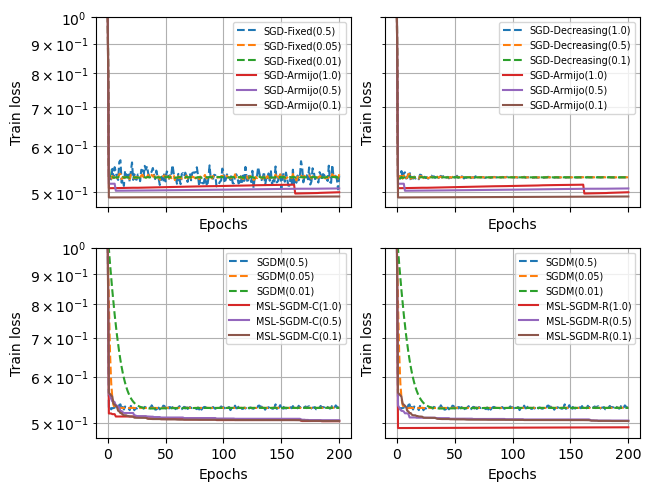

In [14]:
diagnostic(optim_data([sgdSyn_fixed1, sgdSyn_fixed2, sgdSyn_fixed3, sgdSyn_armijo1, sgdSyn_armijo2, sgdSyn_armijo3]),
          optim_data([sgdSyn_decre1, sgdSyn_decre2, sgdSyn_decre3, sgdSyn_armijo1, sgdSyn_armijo2, sgdSyn_armijo3]),
          optim_data([sgdmSyn1, sgdmSyn2, sgdmSyn3, mslcSyn1, mslcSyn2, mslcSyn3]),
          optim_data([sgdmSyn1, sgdmSyn2, sgdmSyn3, mslrSyn1, mslrSyn2, mslrSyn3]))

# Apple quality dataset

In [5]:
CApple = 1

In [6]:
# SGD-Fixed
sgdApple_fixed1 = LogisticRegression(solver="SGD-Fixed", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_fixed2 = LogisticRegression(solver="SGD-Fixed", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_fixed3 = LogisticRegression(solver="SGD-Fixed", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)

In [7]:
# SGD-Decreasing
sgdApple_decre1 = LogisticRegression(solver="SGD-Decreasing", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_decre2 = LogisticRegression(solver="SGD-Decreasing", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_decre3 = LogisticRegression(solver="SGD-Decreasing", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05)

In [8]:
# SGDM
sgdmApple1 = LogisticRegression(solver="SGDM", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
sgdmApple2 = LogisticRegression(solver="SGDM", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
sgdmApple3 = LogisticRegression(solver="SGDM", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [9]:
# SGD-Armijo
sgdApple_armijo1 = LogisticRegression(solver="SGD-Armijo", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_armijo2 = LogisticRegression(solver="SGD-Armijo", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.5)
sgdApple_armijo3 = LogisticRegression(solver="SGD-Armijo", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)

In [21]:
# MSL-SGDM-C
mslcApple1 = LogisticRegression(solver="MSL-SGDM-C", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslcApple2 = LogisticRegression(solver="MSL-SGDM-C", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.5, momentum=0.9)
mslcApple3 = LogisticRegression(solver="MSL-SGDM-C", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)

In [22]:
# MSL-SGDM-R
mslrApple1 = LogisticRegression(solver="MSL-SGDM-R", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslrApple2 = LogisticRegression(solver="MSL-SGDM-R", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.5, momentum=0.9)
mslrApple3 = LogisticRegression(solver="MSL-SGDM-R", C=CApple, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)

In [23]:
modelsApple_data = optim_data([sgdApple_fixed1, sgdApple_fixed2, sgdApple_fixed3, sgdApple_decre1, sgdApple_decre2, sgdApple_decre3, sgdmApple1, sgdmApple2, sgdmApple3,
                               sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3, mslcApple1, mslcApple2, mslcApple3, mslrApple1, mslrApple2, mslrApple3])
#modelsApple_data[["Solver", "Step-size", "Loss"]].sort_values(by="Loss")

## Summary

In [24]:
models_summary(modelsApple_data, benchApple_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
2,CG,1,NaN,NaN,NaN,1644.496101,0.000010,NaN,17,0.745313,0.75375,0.002482
1,Newton-CG,1,NaN,NaN,NaN,1644.496101,0.003009,NaN,11,0.745313,0.75375,0.002482
0,L-BFGS,1,NaN,NaN,NaN,1644.496774,0.712087,NaN,8,0.745313,0.75375,0.000000
13,SGD-Armijo,1,32.0,0.50,0.0,2002.107365,544.029803,20.492640,200,0.687187,0.70625,1.800629
12,SGD-Armijo,1,32.0,1.00,0.0,2003.286885,537.992441,20.666646,200,0.683750,0.70875,1.805004
20,MSL-SGDM-R,1,32.0,0.10,0.9,2004.324078,551.782529,20.122196,200,0.707187,0.72375,1.771567
15,MSL-SGDM-C,1,32.0,1.00,0.9,2004.372928,540.917606,20.657696,200,0.697812,0.71875,1.801408
18,MSL-SGDM-R,1,32.0,1.00,0.9,2007.134100,543.822330,20.293099,200,0.702187,0.72375,1.811333
14,SGD-Armijo,1,32.0,0.10,0.0,2008.401162,550.362874,20.316482,200,0.710000,0.72750,1.806210
16,MSL-SGDM-C,1,32.0,0.50,0.9,2008.902347,550.529340,20.404503,200,0.698438,0.72875,1.797636


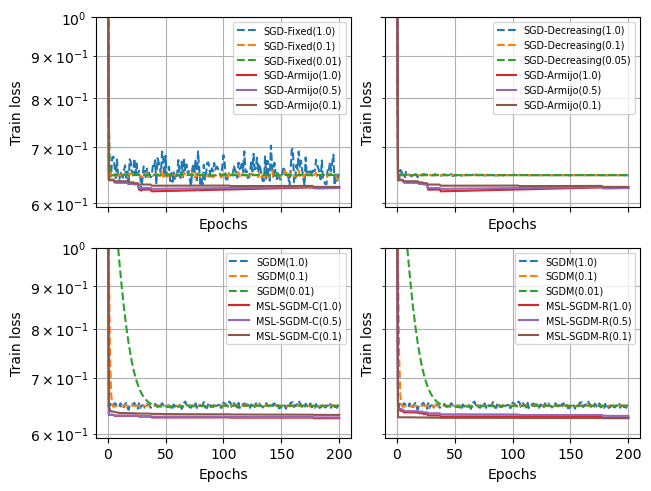

In [25]:
diagnostic(optim_data([sgdApple_fixed1, sgdApple_fixed2, sgdApple_fixed3, sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3]),
           optim_data([sgdApple_decre1, sgdApple_decre2, sgdApple_decre3, sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3]),
           optim_data([sgdmApple1, sgdmApple2, sgdmApple3, mslcApple1, mslcApple2, mslcApple3]),
           optim_data([sgdmApple1, sgdmApple2, sgdmApple3, mslrApple1, mslrApple2, mslrApple3]))

# Cars purchaising dataset

In [6]:
X_train_car.shape

(754, 4)

In [71]:
# SGD-Fixed
sgdCar_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.5)
sgdCar_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.05)
sgdCar_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [72]:
# SGD-Decreasing
sgdCar_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.5)
sgdCar_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [73]:
# SGDM
sgdmCar_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.5, momentum=0.9)
sgdmCar_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.05, momentum=0.9)
sgdmCar_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [74]:
# SGD-Armijo
sgdCar_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.5)
sgdCar_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.05)

In [75]:
# MSL-SGDM-C
mslcCar_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslcCar_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.5, momentum=0.9)
mslcCar_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [76]:
# MSL-SGDM-R
mslrCar_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslrCar_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.5, momentum=0.9)
mslrCar_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [77]:
modelsCar_data = optim_data([sgdCar_fixed1, sgdCar_fixed2, sgdCar_fixed3, sgdCar_decre1, sgdCar_decre2, sgdCar_decre3, sgdmCar_1, sgdmCar_2, sgdmCar_3,
                             sgdCar_armijo1, sgdCar_armijo2, sgdCar_armijo3, mslcCar_1, mslcCar_2, mslcCar_3, mslrCar_1, mslrCar_2, mslrCar_3])
#modelsCar_data[["Solver", "Loss"]].sort_values(by="Loss")

## Summary

In [78]:
models_summary(modelsCar_data, benchCar_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
1,Newton-CG,1,NaN,NaN,NaN,283.168154,0.000007,NaN,9,0.826260,0.830688,0.000141
2,CG,1,NaN,NaN,NaN,283.168154,0.000003,NaN,13,0.826260,0.830688,0.000141
0,L-BFGS,1,NaN,NaN,NaN,283.168154,0.010607,NaN,7,0.826260,0.830688,0.000000
17,MSL-SGDM-C,1,16.0,0.01,0.9,418.898961,184.382366,3.791944,200,0.740053,0.740741,2.107316
20,MSL-SGDM-R,1,16.0,0.01,0.9,420.012105,185.661638,3.716234,200,0.730769,0.740741,2.107034
18,MSL-SGDM-R,1,16.0,1.00,0.9,421.095904,185.291477,3.892438,200,0.818302,0.804233,2.161096
19,MSL-SGDM-R,1,16.0,0.50,0.9,421.228942,185.476019,3.871265,200,0.805040,0.783069,2.157639
15,MSL-SGDM-C,1,16.0,1.00,0.9,421.942491,186.276108,3.958558,200,0.824934,0.814815,2.165533
14,SGD-Armijo,1,16.0,0.05,0.0,422.127837,186.379665,3.801171,200,0.810345,0.783069,2.163091
16,MSL-SGDM-C,1,16.0,0.50,0.9,422.260877,186.645054,3.934037,200,0.806366,0.798942,2.163313


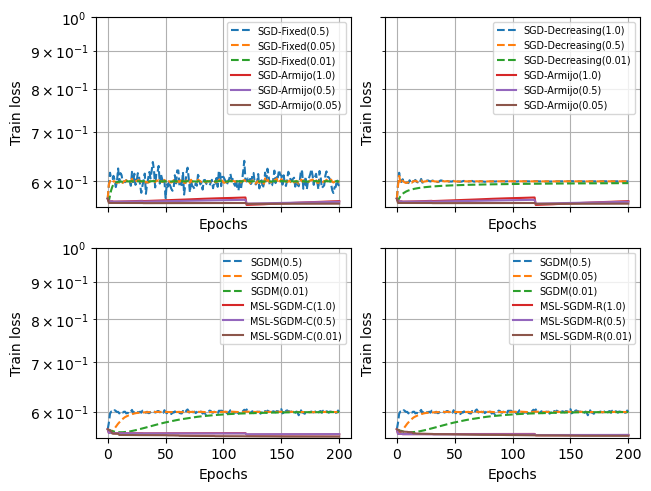

In [79]:
diagnostic(optim_data([sgdCar_fixed1, sgdCar_fixed2, sgdCar_fixed3, sgdCar_armijo1, sgdCar_armijo2, sgdCar_armijo3]),
           optim_data([sgdCar_decre1, sgdCar_decre2, sgdCar_decre3, sgdCar_armijo1, sgdCar_armijo2, sgdCar_armijo3]),
           optim_data([sgdmCar_1, sgdmCar_2, sgdmCar_3, mslcCar_1, mslcCar_2, mslcCar_3]),
           optim_data([sgdmCar_1, sgdmCar_2, sgdmCar_3, mslrCar_1, mslrCar_2, mslrCar_3]))

# Loan eligibility dataset

In [14]:
# SGD-Fixed
sgdLoan_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.5)
sgdLoan_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)
sgdLoan_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.005)

In [6]:
# SGD-Decreasing
sgdLoan_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.5)
sgdLoan_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

In [15]:
# SGDM
sgdmLoan_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.5, momentum=0.9)
sgdmLoan_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05, momentum=0.9)
sgdmLoan_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.005, momentum=0.9)

In [7]:
# SGD-Armijo
sgdLoan_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

In [9]:
# MSL-SGDM-C
mslcLoan1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslcLoan2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslcLoan3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrLoan1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslrLoan2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslrLoan3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05, momentum=0.9)

In [16]:
modelsLoan_data = optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_fixed3, sgdLoan_decre1, sgdLoan_decre2, sgdLoan_decre3, sgdmLoan_1, sgdmLoan_2, sgdmLoan_3,
                              sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3, mslcLoan1, mslcLoan2, mslcLoan3, mslrLoan1, mslrLoan2, mslrLoan3])

## Summary

In [17]:
models_summary(modelsLoan_data, benchLoan_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
1,Newton-CG,1,NaN,NaN,NaN,184.423039,0.000605,NaN,10,0.807292,0.822917,0.002784
2,CG,1,NaN,NaN,NaN,184.423039,0.000005,NaN,17,0.807292,0.822917,0.002784
0,L-BFGS,1,NaN,NaN,NaN,184.423165,0.095427,NaN,9,0.807292,0.822917,0.000000
13,SGD-Armijo,1,16.0,0.100,0.0,226.967927,83.803447,1.886939,200,0.804688,0.812500,1.133925
15,MSL-SGDM-C,1,16.0,1.000,0.9,227.141809,83.944483,1.963038,200,0.799479,0.812500,1.138850
18,MSL-SGDM-R,1,16.0,1.000,0.9,227.168737,83.971288,1.925269,200,0.804688,0.791667,1.136016
14,SGD-Armijo,1,16.0,0.050,0.0,227.929526,84.778135,1.871493,200,0.799479,0.822917,1.145632
17,MSL-SGDM-C,1,16.0,0.050,0.9,229.349238,86.206079,1.846921,200,0.791667,0.791667,1.155014
20,MSL-SGDM-R,1,16.0,0.050,0.9,230.223274,87.168852,1.828668,200,0.786458,0.781250,1.165396
16,MSL-SGDM-C,1,16.0,0.100,0.9,231.616557,88.926581,1.892842,200,0.796875,0.822917,1.187928


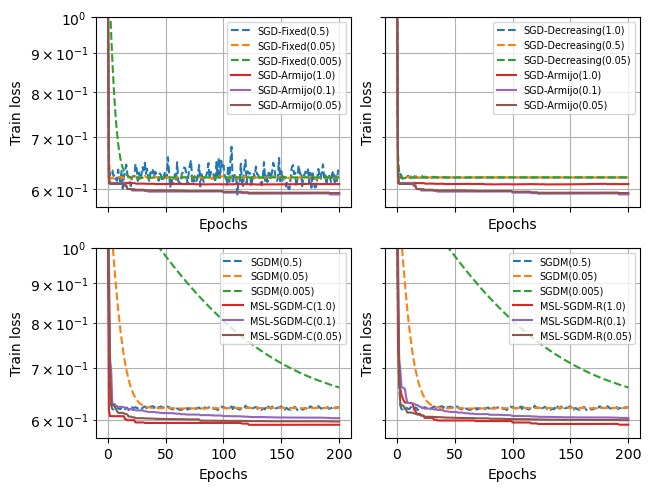

In [18]:
diagnostic(optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_fixed3, sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3]),
           optim_data([sgdLoan_decre1, sgdLoan_decre2, sgdLoan_decre3, sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3]),
           optim_data([sgdmLoan_1, sgdmLoan_2, sgdmLoan_3, mslcLoan1, mslcLoan2, mslcLoan3]),
           optim_data([sgdmLoan_1, sgdmLoan_2, sgdmLoan_3, mslrLoan1, mslrLoan2, mslrLoan3]))

# HR score dataset

In [114]:
# SGD-Fixed
sgdHR_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.5)
sgdHR_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [115]:
# SGD-Decreasing
sgdHR_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.05)

In [116]:
# SGDM
sgdmHR1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.5, momentum=0.9)
sgdmHR2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
sgdmHR3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [117]:
# SGD-Armijo
sgdHR_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [118]:
# MSL-SGDM-C
mslcHR1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslcHR2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslcHR3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [119]:
# MSL-SGDM-R
mslrHR1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslrHR2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslrHR3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [120]:
modelsHR_data = optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_fixed3, sgdHR_decre1, sgdHR_decre2, sgdHR_decre3, sgdmHR1, sgdmHR2, sgdmHR3,
                           sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3, mslcHR1, mslcHR2, mslcHR3, mslrHR1, mslrHR2, mslrHR3])

## Summary

In [121]:
models_summary(modelsHR_data, benchHR_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
1,Newton-CG,1,NaN,NaN,NaN,48.328557,0.000085,NaN,11,0.937500,0.916667,0.005638
2,CG,1,NaN,NaN,NaN,48.328557,0.000009,NaN,28,0.937500,0.916667,0.005638
0,L-BFGS,1,NaN,NaN,NaN,48.328602,0.017944,NaN,13,0.937500,0.916667,0.000000
12,SGD-Armijo,1,16.0,1.00,0.0,77.435260,57.249903,1.478771,200,0.895833,0.866667,2.621691
19,MSL-SGDM-R,1,16.0,0.10,0.9,86.143401,65.258724,1.361522,200,0.883333,0.850000,2.897077
16,MSL-SGDM-C,1,16.0,0.10,0.9,86.143405,65.258750,1.360142,200,0.883333,0.850000,2.897077
17,MSL-SGDM-C,1,16.0,0.01,0.9,87.415505,64.962923,1.366168,200,0.883333,0.850000,2.980205
20,MSL-SGDM-R,1,16.0,0.01,0.9,89.358210,73.254640,1.331447,200,0.887500,0.850000,2.959652
15,MSL-SGDM-C,1,16.0,1.00,0.9,90.425987,80.651568,1.456961,200,0.879167,0.850000,2.906608
13,SGD-Armijo,1,16.0,0.10,0.0,90.520644,81.150048,1.427765,200,0.883333,0.850000,2.909035


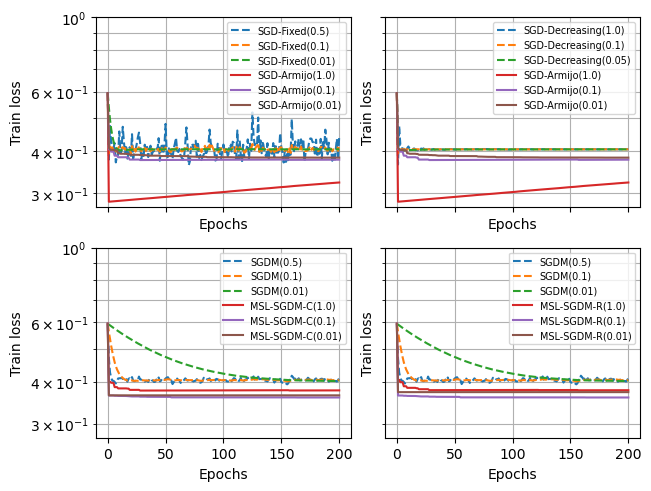

In [122]:
diagnostic(optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_fixed3, sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3]),
           optim_data([sgdHR_decre1, sgdHR_decre2, sgdHR_decre3, sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3]),
           optim_data([sgdmHR1, sgdmHR2, sgdmHR3, mslcHR1, mslcHR2, mslcHR3]),
           optim_data([sgdmHR1, sgdmHR2, sgdmHR3, mslrHR1, mslrHR2, mslrHR3]))

# Bank churn dataset

In [5]:
X_train_bank.shape

(8000, 11)

In [57]:
# SGD-Fixed
sgdBank_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgdBank_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.05)

In [58]:
# SGD-Decreasing
sgdBank_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1)
sgdBank_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgdBank_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)

In [59]:
# SGDM
sgdmBank1 = LogisticRegression(solver="SGDM", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5, momentum=0.9)
sgdmBank2 = LogisticRegression(solver="SGDM", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)
sgdmBank3 = LogisticRegression(solver="SGDM", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.05, momentum=0.9)

In [60]:
# SGD-Armijo
sgdBank_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1)
sgdBank_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgdBank_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)

In [61]:
# MSL-SGDM-C
mslcBank1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1, momentum=0.9)
mslcBank2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5, momentum=0.9)
mslcBank3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)

In [62]:
# MSL-SGDM-R
mslrBank1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1, momentum=0.9)
mslrBank2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5, momentum=0.9)
mslrBank3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)

In [63]:
modelsBank_data = optim_data([sgdBank_fixed1, sgdBank_fixed2, sgdBank_fixed3, sgdBank_decre1, sgdBank_decre2, sgdBank_decre3, sgdmBank1, sgdmBank2, sgdmBank3,
                              sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3, mslcBank1, mslcBank2, mslcBank3, mslrBank1, mslrBank2, mslrBank3])

## Summary

In [66]:
models_summary(modelsBank_data, benchBank_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
2,CG,1,NaN,NaN,NaN,3504.987491,0.000016,NaN,15,0.807250,0.8155,0.002066
1,Newton-CG,1,NaN,NaN,NaN,3504.987491,0.001896,NaN,11,0.807250,0.8155,0.002066
0,L-BFGS,1,NaN,NaN,NaN,3504.989121,1.674165,NaN,10,0.806875,0.8155,0.000000
15,MSL-SGDM-C,1,128.0,1.00,0.9,4507.957578,1714.012155,29.638418,200,0.769750,0.7690,1.429302
17,MSL-SGDM-C,1,128.0,0.10,0.9,4557.513941,1783.248194,28.684250,200,0.754125,0.7525,1.438707
20,MSL-SGDM-R,1,128.0,0.10,0.9,4648.556416,1861.809661,28.695843,200,0.768250,0.7600,1.497889
13,SGD-Armijo,1,128.0,0.50,0.0,4689.655058,1909.469104,29.747984,200,0.775125,0.7695,1.524808
12,SGD-Armijo,1,128.0,1.00,0.0,4722.515015,1937.345158,29.761134,200,0.784625,0.7840,1.544999
16,MSL-SGDM-C,1,128.0,0.50,0.9,4778.569697,1982.619643,29.700431,200,0.785500,0.7930,1.578579
14,SGD-Armijo,1,128.0,0.10,0.0,4820.469461,2023.569430,29.238189,200,0.801625,0.8045,1.596710


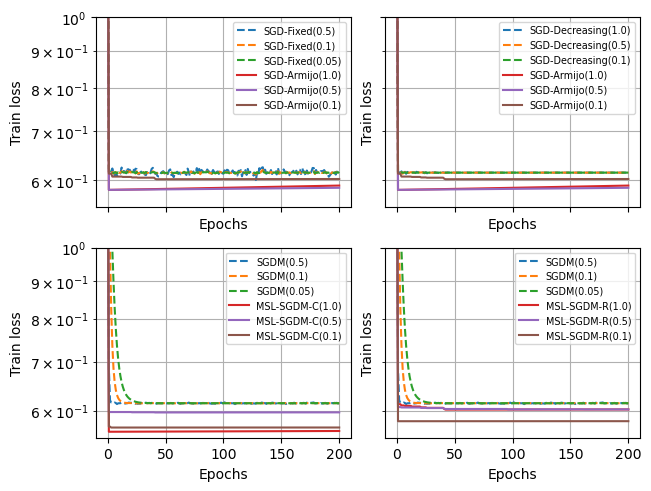

In [67]:
diagnostic(optim_data([sgdBank_fixed1, sgdBank_fixed2, sgdBank_fixed3, sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3]),
           optim_data([sgdBank_decre1, sgdBank_decre2, sgdBank_decre3, sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3]),
           optim_data([sgdmBank1, sgdmBank2, sgdmBank3, mslcBank1, mslcBank2, mslcBank3]),
           optim_data([sgdmBank1, sgdmBank2, sgdmBank3, mslrBank1, mslrBank2, mslrBank3]))

# Breast cancer dataset

In [13]:
# SGD-Fixed
sgdBreast_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5)
sgdBreast_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

In [6]:
# SGD-Decreasing
sgdBreast_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05)

In [8]:
# SGDM
sgdmBreast_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5, momentum=0.9)
sgdmBreast_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
sgdmBreast_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [7]:
# SGD-Armijo
sgdBreast_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5)
sgdBreast_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05)

In [9]:
# MSL-SGDM-C
mslcBreast_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslcBreast_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5, momentum=0.9)
mslcBreast_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrBreast_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslrBreast_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5, momentum=0.9)
mslrBreast_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05, momentum=0.9)

In [14]:
modelsBreast_data = optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3, sgdmBreast_1, sgdmBreast_2, sgdmBreast_3,
                                sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3, mslcBreast_1, mslcBreast_2, mslcBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3])

## Summary

In [15]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
2,CG,1,NaN,NaN,NaN,206.612101,0.000019,NaN,29,0.362637,0.412281,0.043966
1,Newton-CG,1,NaN,NaN,NaN,206.612102,0.001591,NaN,84,0.362637,0.412281,0.043543
0,L-BFGS,1,NaN,NaN,NaN,206.613346,0.066685,NaN,12,0.362637,0.412281,0.000000
13,SGD-Armijo,1,16.0,0.50,0.0,242.227708,77.738970,2.311771,200,0.347253,0.385965,2.333683
15,MSL-SGDM-C,1,16.0,1.00,0.9,242.501284,84.076377,2.266121,200,0.347253,0.394737,2.289303
16,MSL-SGDM-C,1,16.0,0.50,0.9,243.105176,87.823931,2.239408,200,0.351648,0.394737,2.285228
19,MSL-SGDM-R,1,16.0,0.50,0.9,243.229372,85.160753,2.238035,200,0.347253,0.394737,2.309897
18,MSL-SGDM-R,1,16.0,1.00,0.9,244.078685,88.899613,2.249558,200,0.356044,0.403509,2.286381
14,SGD-Armijo,1,16.0,0.05,0.0,244.393508,89.581395,2.188362,200,0.349451,0.394737,2.295707
17,MSL-SGDM-C,1,16.0,0.05,0.9,244.872252,90.154377,2.217371,200,0.342857,0.377193,2.398898


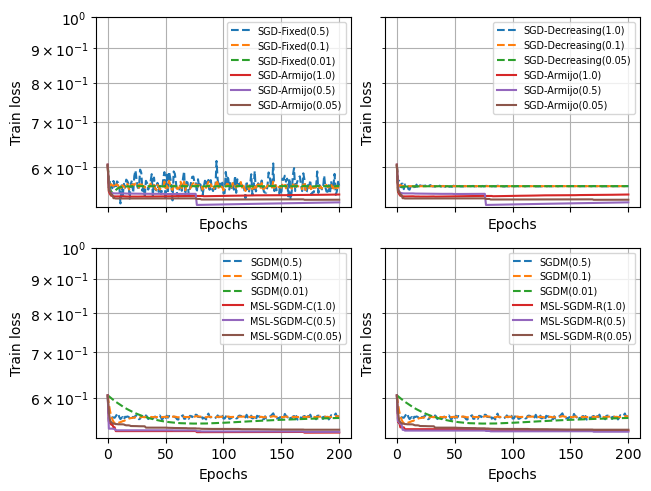

In [16]:
diagnostic(optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3]),
           optim_data([sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3, sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3]),
           optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3, mslcBreast_1, mslcBreast_2, mslcBreast_3]),
           optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3]))

# Heart attack dataset

In [101]:
# SGD-fixed
sgdHeart_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.5)
sgdHeart_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)
sgdHeart_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01)

In [102]:
# SGD-Decreasing
sgdHeart_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1)
sgdHeart_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)
sgdHeart_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01)

In [103]:
# SGDM
sgdmHeart1 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.5, momentum=0.9)
sgdmHeart2 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)
sgdmHeart3 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01, momentum=0.9)

In [104]:
# SGD-Armijo
sgdHeart_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1)
sgdHeart_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)
sgdHeart_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.05)

In [105]:
# MSL-SGDM-C
mslcHeart1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1, momentum=0.9)
mslcHeart2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)
mslcHeart3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.05, momentum=0.9)

In [106]:
# MSL-SGDM-C
mslrHeart1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1, momentum=0.9)
mslrHeart2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)
mslrHeart3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.05, momentum=0.9)

In [107]:
modelsHeart_data = optim_data([sgdHeart_fixed1, sgdHeart_fixed2, sgdHeart_fixed3, sgdHeart_decre1, sgdHeart_decre2, sgdHeart_decre3, sgdmHeart1, sgdmHeart2, sgdmHeart3,
                               sgdHeart_armijo1, sgdHeart_armijo2, sgdHeart_armijo3, mslcHeart1, mslcHeart2, mslcHeart3, mslrHeart1, mslrHeart2, mslrHeart3])

## Summary

In [108]:
models_summary(modelsHeart_data, benchHeart_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
1,Newton-CG,1,NaN,NaN,NaN,85.677227,0.000266,NaN,13,0.858921,0.836066,0.003460
2,CG,1,NaN,NaN,NaN,85.677227,0.000011,NaN,16,0.858921,0.836066,0.003460
0,L-BFGS,1,NaN,NaN,NaN,85.677288,0.039044,NaN,11,0.858921,0.836066,0.000000
12,SGD-Armijo,1,16.0,1.00,0.0,120.735389,69.338461,1.499845,200,0.796680,0.836066,1.467439
14,SGD-Armijo,1,16.0,0.05,0.0,121.342100,70.763622,1.431249,200,0.800830,0.836066,1.465397
13,SGD-Armijo,1,16.0,0.10,0.0,121.828203,71.714423,1.430317,200,0.821577,0.852459,1.474173
18,MSL-SGDM-R,1,16.0,1.00,0.9,122.020432,72.555062,1.431643,200,0.829876,0.836066,1.469430
15,MSL-SGDM-C,1,16.0,1.00,0.9,122.038231,72.545991,1.443960,200,0.829876,0.852459,1.470528
16,MSL-SGDM-C,1,16.0,0.10,0.9,122.540364,73.339092,1.393058,200,0.842324,0.836066,1.468053
17,MSL-SGDM-C,1,16.0,0.05,0.9,123.615998,74.806879,1.361559,200,0.821577,0.819672,1.500525


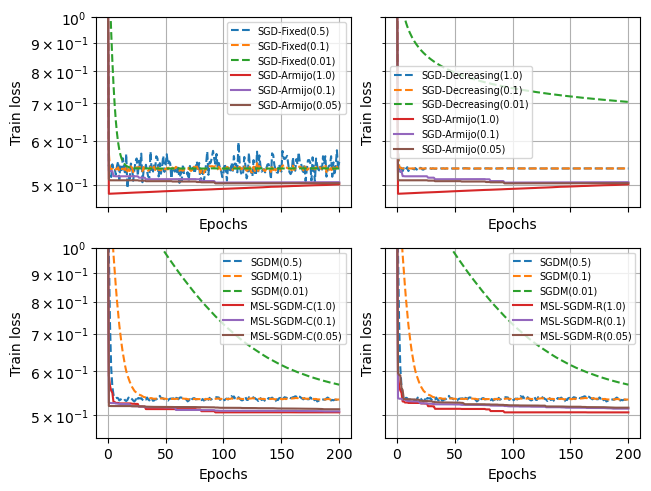

In [109]:
diagnostic(optim_data([sgdHeart_fixed1, sgdHeart_fixed2, sgdHeart_fixed3, sgdHeart_armijo1, sgdHeart_armijo2, sgdHeart_armijo3]),
           optim_data([sgdHeart_decre1, sgdHeart_decre2, sgdHeart_decre3, sgdHeart_armijo1, sgdHeart_armijo2, sgdHeart_armijo3]),
           optim_data([sgdmHeart1, sgdmHeart2, sgdmHeart3, mslcHeart1, mslcHeart2, mslcHeart3]),
           optim_data([sgdmHeart1, sgdmHeart2, sgdmHeart3, mslrHeart1, mslrHeart2, mslrHeart3]))

# Diabetes dataset

In [5]:
X_train_diab.shape

(595, 9)

In [86]:
# SGD-Fixed
sgdDiab_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.5)
sgdDiab_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1)
sgdDiab_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.05)

In [87]:
# SGD-Decreasing
sgdDiab_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1)
sgdDiab_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1)
sgdDiab_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.05)

In [88]:
# SGDM
sgdmDiab1 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
sgdmDiab2 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)
sgdmDiab3 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.05, momentum=0.9)

In [89]:
# SGD-Armijo
sgdDiab_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1)
sgdDiab_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1)
sgdDiab_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.05)

In [90]:
# MSL-SGDM-C
mslcDiab1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
mslcDiab2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)
mslcDiab3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.05, momentum=0.9)

In [91]:
# MSL-SGDM-R
mslrDiab1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
mslrDiab2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)
mslrDiab3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.05, momentum=0.9)

In [92]:
modelsDiab_data = optim_data([sgdDiab_fixed1, sgdDiab_fixed2, sgdDiab_fixed3, sgdDiab_decre1, sgdDiab_decre2, sgdDiab_decre3, sgdmDiab1, sgdmDiab2, sgdmDiab3,
                              sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3, mslcDiab1, mslcDiab2, mslcDiab3, mslrDiab1, mslrDiab2, mslrDiab3])

## Summary

In [93]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
2,CG,1,NaN,NaN,NaN,284.811835,0.000002,NaN,17,0.773109,0.778523,0.001965
1,Newton-CG,1,NaN,NaN,NaN,284.811835,0.003936,NaN,10,0.773109,0.778523,0.001965
0,L-BFGS,1,NaN,NaN,NaN,284.811958,0.151358,NaN,8,0.773109,0.778523,0.000000
12,SGD-Armijo,1,16.0,1.00,0.0,342.938640,118.091688,3.138680,200,0.757983,0.798658,1.263903
13,SGD-Armijo,1,16.0,0.10,0.0,348.747043,125.540561,3.071131,200,0.751261,0.778523,1.312670
18,MSL-SGDM-R,1,16.0,1.00,0.9,348.775299,125.286700,3.114381,200,0.752941,0.758389,1.314407
15,MSL-SGDM-C,1,16.0,1.00,0.9,348.786611,125.342885,3.135287,200,0.757983,0.765101,1.315818
14,SGD-Armijo,1,16.0,0.05,0.0,349.864208,127.127408,3.043802,200,0.756303,0.765101,1.321584
20,MSL-SGDM-R,1,16.0,0.05,0.9,351.148354,123.541661,2.993065,200,0.744538,0.758389,1.357704
19,MSL-SGDM-R,1,16.0,0.10,0.9,354.860444,131.332077,3.039378,200,0.734454,0.724832,1.370977


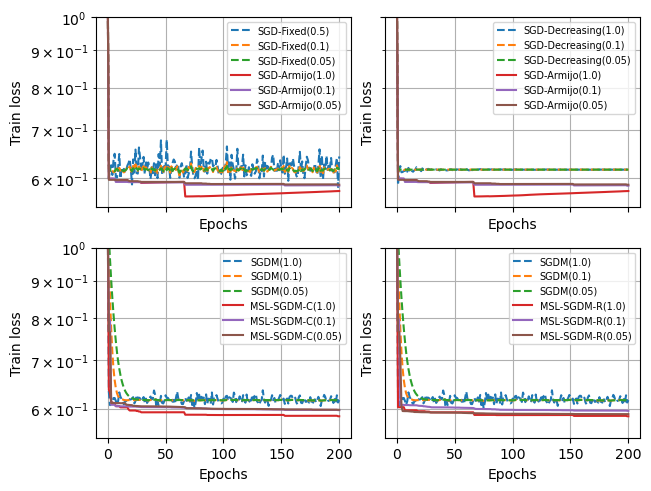

In [94]:
diagnostic(optim_data([sgdDiab_fixed1, sgdDiab_fixed2, sgdDiab_fixed3, sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3]),
           optim_data([sgdDiab_decre1, sgdDiab_decre2, sgdDiab_decre3, sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3]),
           optim_data([sgdmDiab1, sgdmDiab2, sgdmDiab3, mslcDiab1, mslcDiab2, mslcDiab3]),
           optim_data([sgdmDiab1, sgdmDiab2, sgdmDiab3, mslrDiab1, mslrDiab2, mslrDiab3]))

# Apple, Cars, Bank, Diabetes, Heart, HR

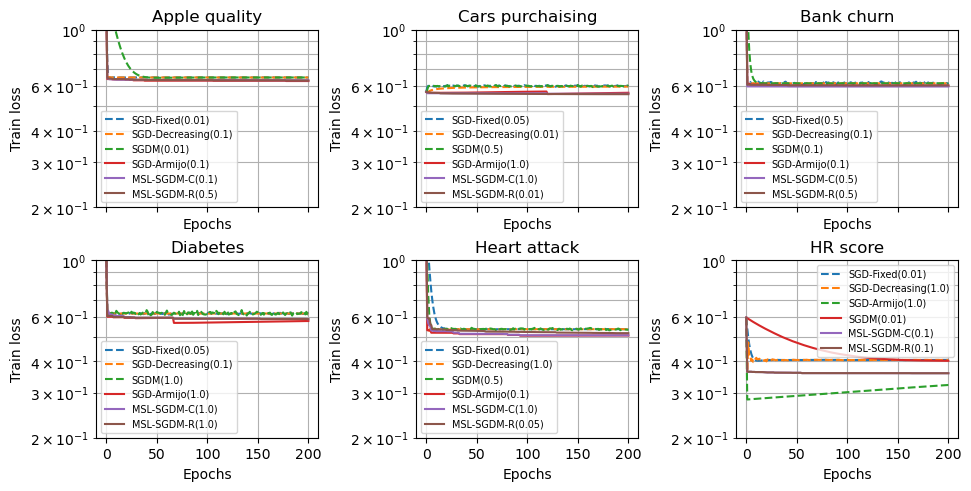

In [125]:
datasets1 = ["Apple quality", "Cars purchaising", "Bank churn", "Diabetes", "Heart attack", "HR score"]
models1 = [optim_data([sgdApple_fixed3, sgdApple_decre2, sgdmApple3, sgdApple_armijo3, mslcApple3, mslrApple2]),
           optim_data([sgdCar_fixed2, sgdCar_decre3, sgdmCar_1, sgdCar_armijo1, mslcCar_1, mslrCar_3]),
           optim_data([sgdBank_fixed1, sgdBank_decre3, sgdmBank2, sgdBank_armijo3, mslcBank2, mslrBank2]),
           optim_data([sgdDiab_fixed3, sgdDiab_decre2, sgdmDiab1, sgdDiab_armijo1, mslcDiab1, mslrDiab1]),
           optim_data([sgdHeart_fixed3, sgdHeart_decre1, sgdmHeart1, sgdHeart_armijo2, mslcHeart1, mslrHeart3]),
           optim_data([sgdHR_fixed3, sgdHR_decre1, sgdHR_armijo1, sgdmHR3, mslcHR2, mslrHR2])]
fig, axs = plt.subplots(2, 3, layout="constrained", sharex=True, figsize=(6.4*1.5, 4.8))
i = 0
for ax, name in zip(axs.flat, datasets1):
    plot_loss(ax, models1[i])
    ax.set_title(name)
    ax.set_ylim(0.2)
    i += 1
    if i == len(models1):
        break